# Project 3: HR Analytics

##### The project aimed to uncover the factors contributing to attrition and provide insights that could help reduce the attrition rate.

### Objectives: 
- Data Cleaning
- Data Visualization
- Model Building

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Basic Information from Data

In [3]:
df.shape 

(1470, 35)

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Removing unnecessary columns

In [5]:
# remove columns that just have one unique values
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

### Checking null values

In [14]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**No Null values found in dataset**

In [13]:
df.duplicated().sum()

0

**No Duplicate values found in dataset**

## Data Visualization

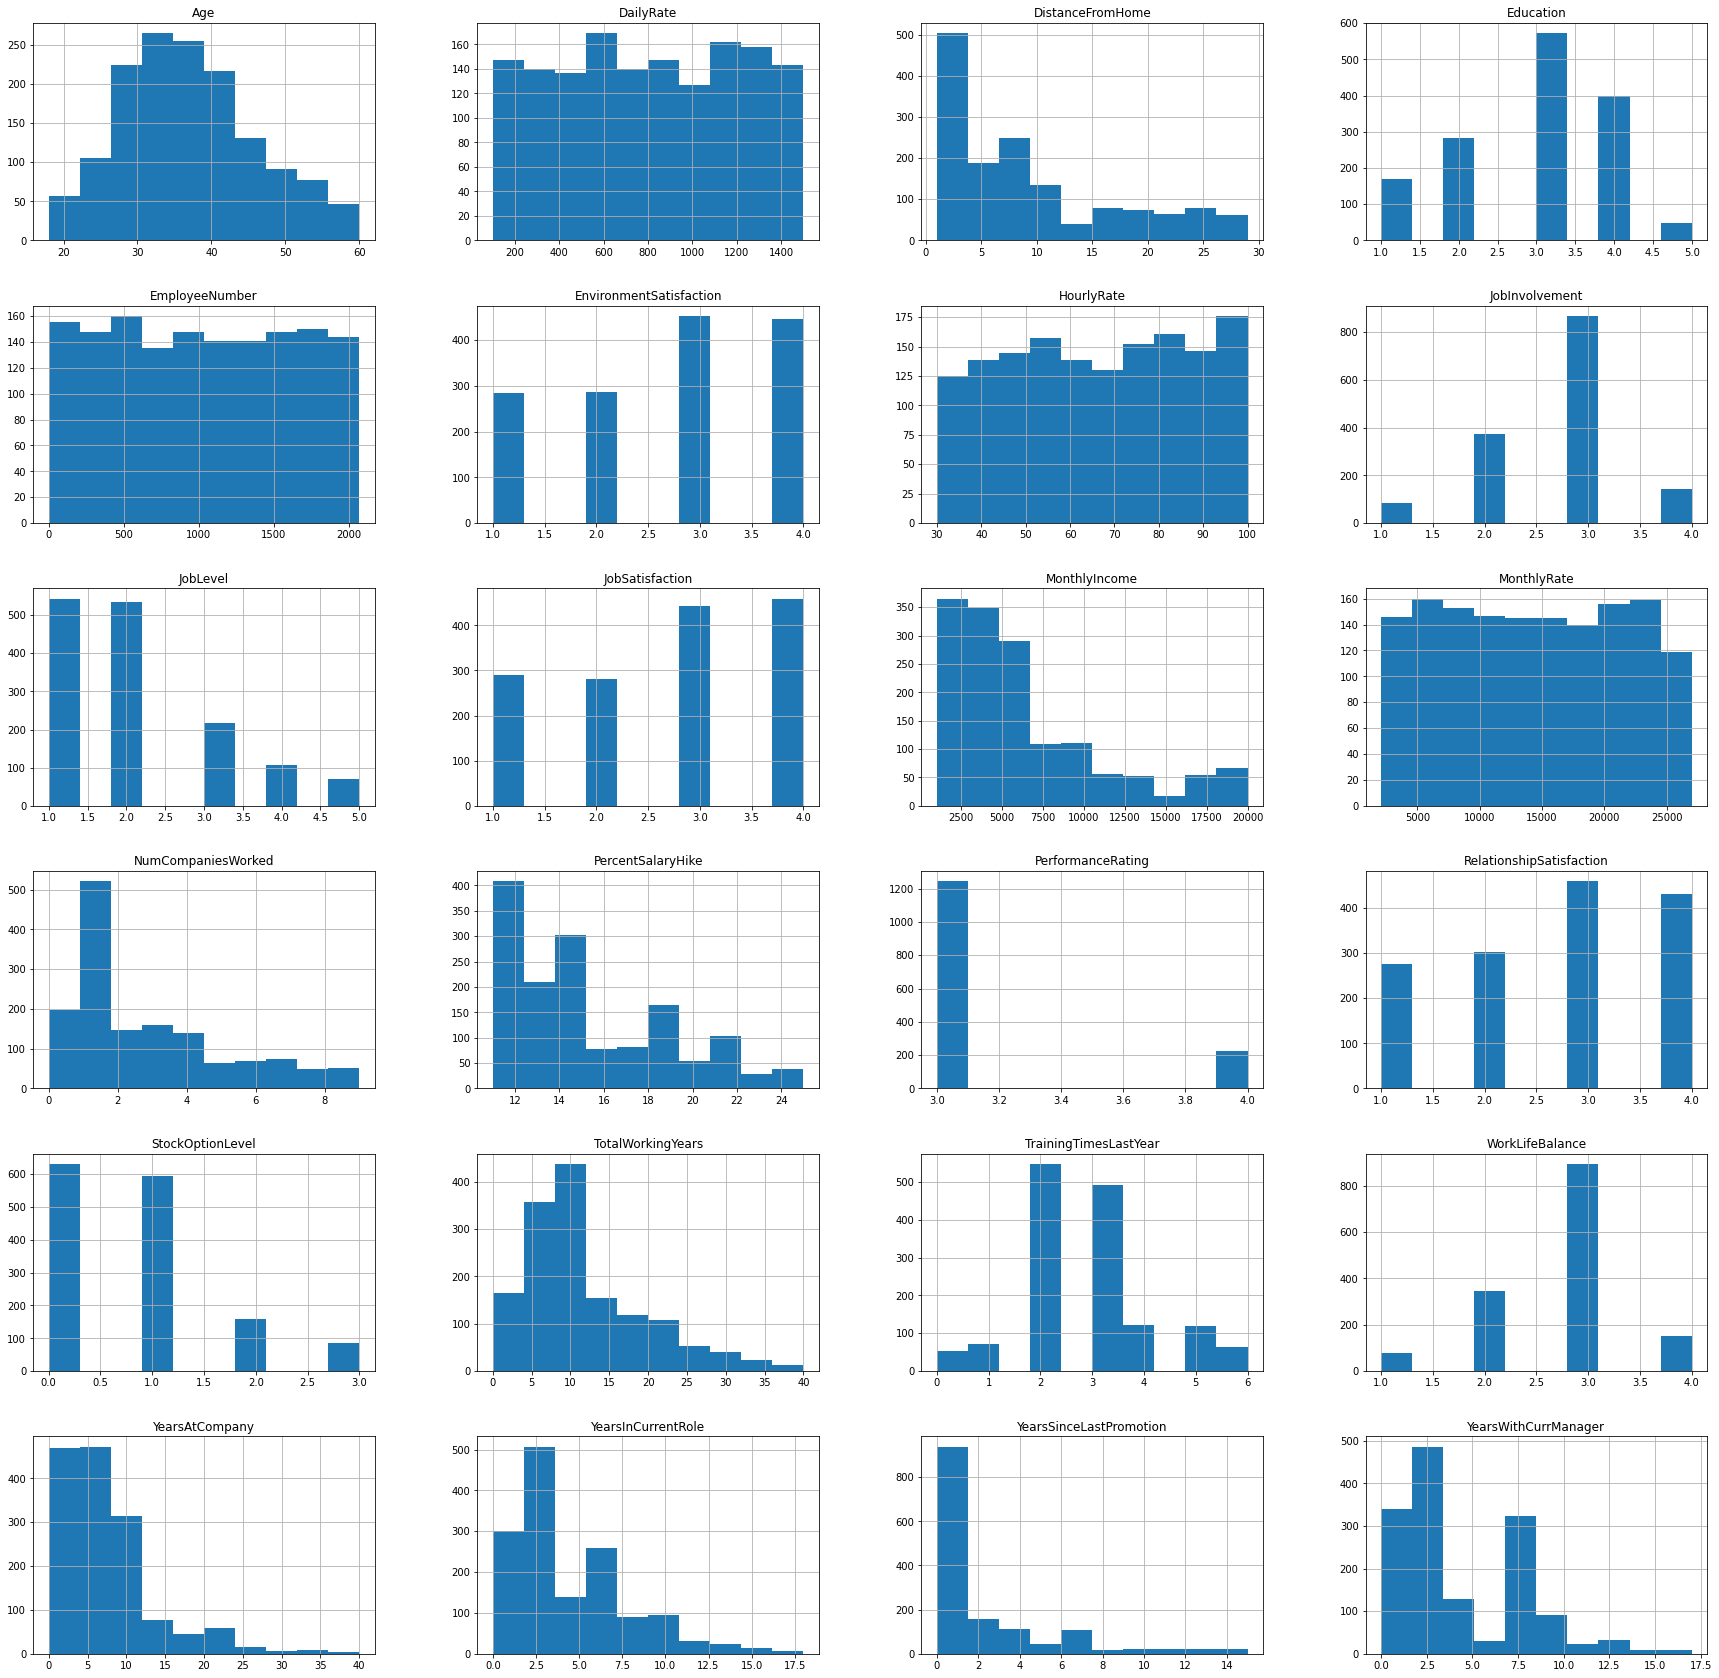

In [70]:
fig, axis = plt.subplots(6, 4,figsize=(30,30))

df.hist(ax=axis.flatten()[:24]);

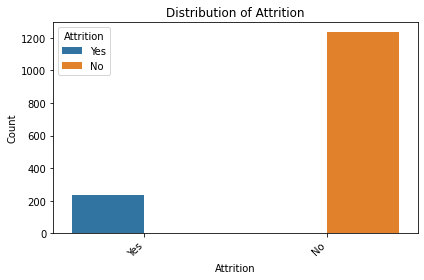

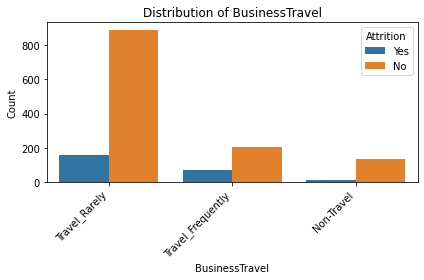

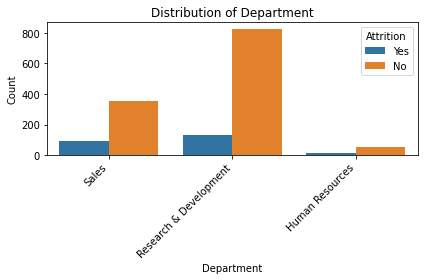

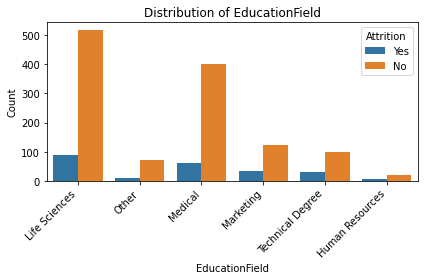

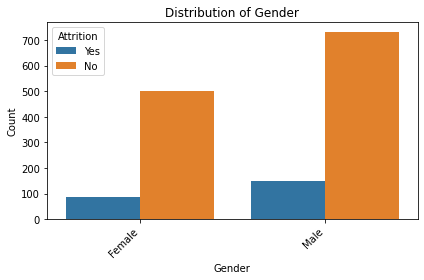

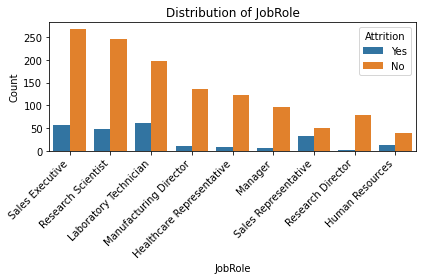

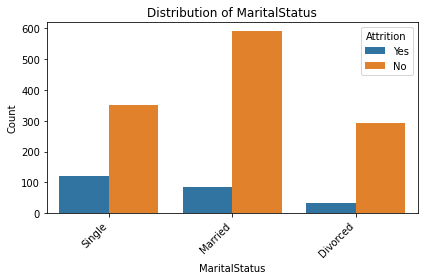

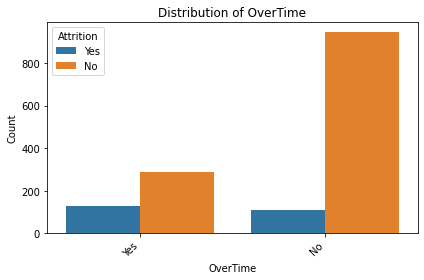

In [14]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create histogram plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col,hue='Attrition')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

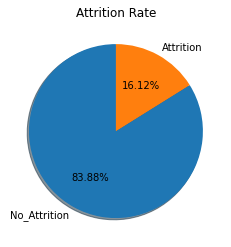

In [41]:
d=df["Attrition"].value_counts(normalize=True)*100
keys=df["Attrition"].value_counts().head().index
plt.pie(d, labels=['No_Attrition', 'Attrition'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.title("Attrition Rate")
plt.show()


## Employee Attrition rate is 16.12% 

In [42]:
# Cross-tabulate OverTime and Attrition
over_time = pd.crosstab(df['Attrition'], df['OverTime'])
over_time

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127

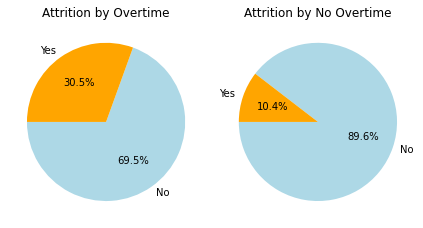

In [155]:
# Plot a pie chart for each category of OverTime
fig, ax = plt.subplots(1,2)

labels = over_time.index
colors = ['lightblue', 'orange']
ax[0].pie(over_time['Yes'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
ax[1].pie(over_time['No'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
ax[0].set_title("Attrition by Overtime")
ax[1].set_title("Attrition by No Overtime")
#plt.axis('equal')
plt.tight_layout()
plt.show()

**Employee with overtime have 30% attrition rate as comapare to No Overtime of 10.4%.**

In [31]:
gender = pd.crosstab(df['Attrition'], df['Gender'])
gender.head()

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150

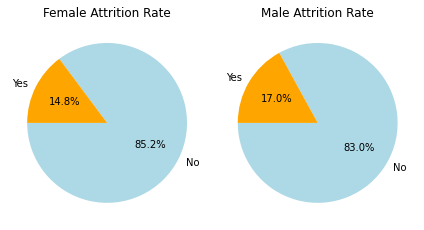

In [40]:
# Cross-tabulate OverTime and Attrition
gender = pd.crosstab(df['Attrition'], df['Gender'])

# Plot a pie chart for each category of OverTime
fig, axs = plt.subplots(1,2)
labels = gender.index
colors = ['lightblue', 'orange']
axs[0].pie(gender['Female'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[1].pie(gender['Male'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[0].set_title("Female Attrition Rate")
axs[1].set_title("Male Attrition Rate")
#plt.axis('equal')
plt.tight_layout()
plt.show()

**Male have slightly more attrition rate than female**

In [57]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

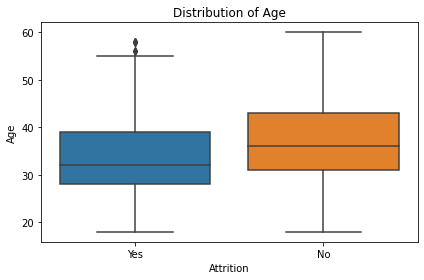

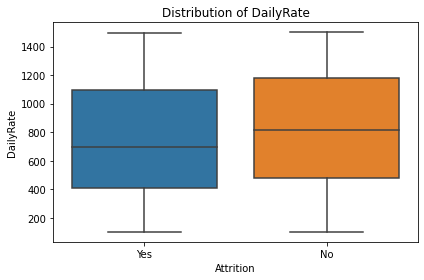

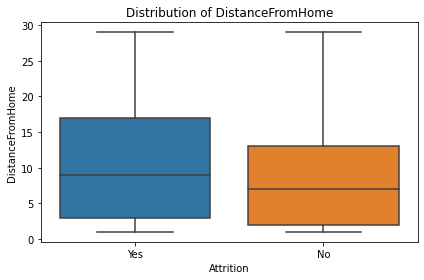

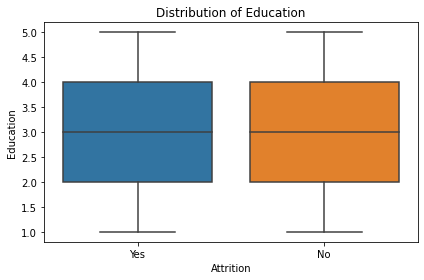

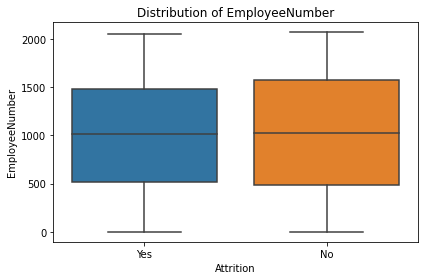

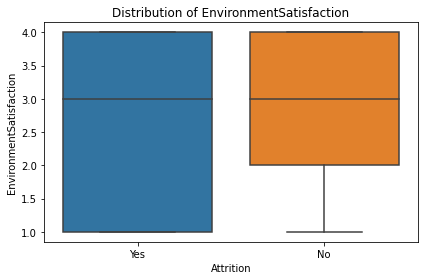

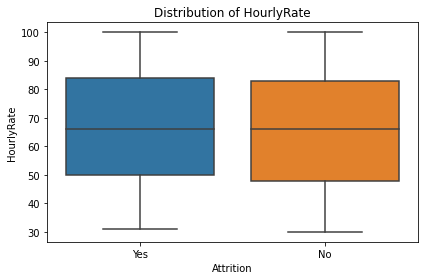

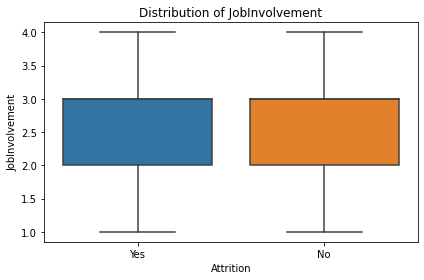

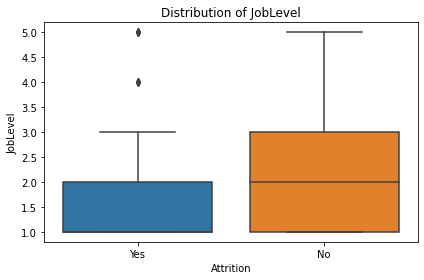

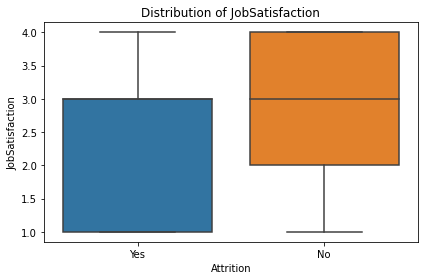

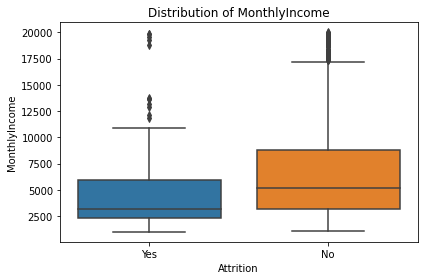

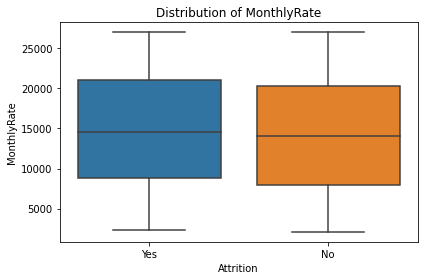

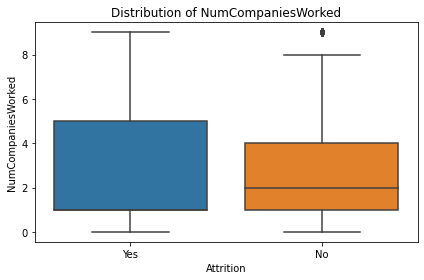

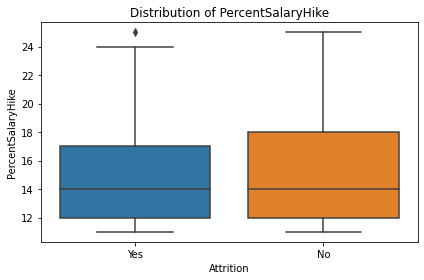

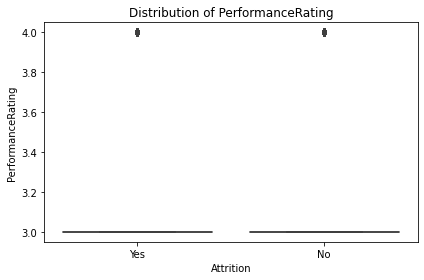

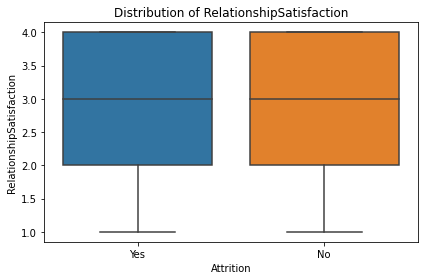

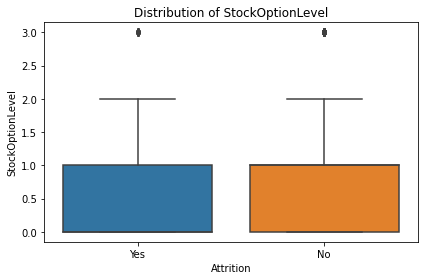

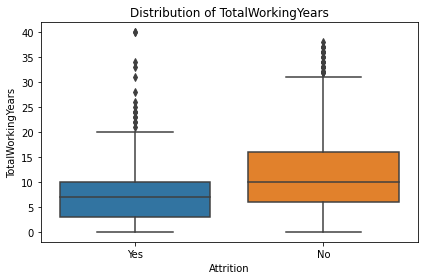

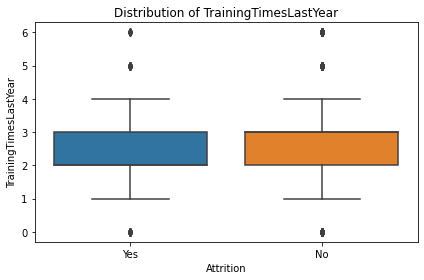

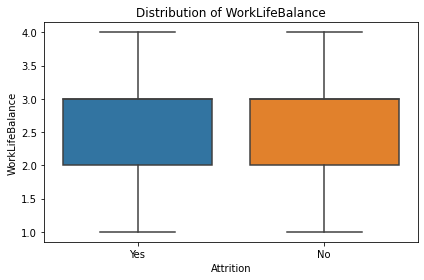

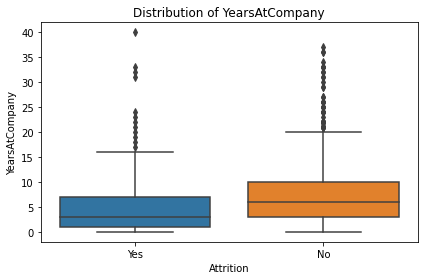

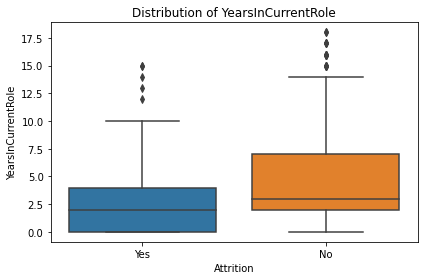

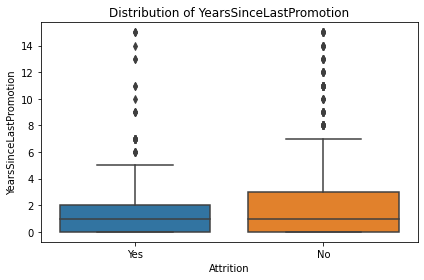

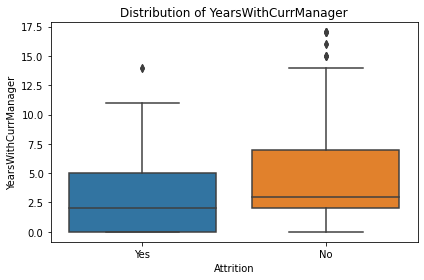

In [64]:
# List of categorical columns
numeric_columns = df.select_dtypes(include=['int']).columns

# Create histogram plots for categorical columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col,x='Attrition')
    plt.title(f'Distribution of {col}')
    #plt.xlabel()
    plt.ylabel(f'{col}')
    #plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [66]:
work_env = df.groupby("Attrition")["EnvironmentSatisfaction"].value_counts().reset_index(name="Count")
# Create a bar plot to visualize attrition based on environment satisfaction
fig = px.bar(work_env, x="EnvironmentSatisfaction", y="Count", color="Attrition",barmode='overlay',
             title="Attrition based on Environment Satisfaction",
             labels={"EnvironmentSatisfaction": "Environment Satisfaction",
                     "Count": "Count", "Attrition": "Attrition"},
             category_orders={"Attrition": ["No", "Yes"]},
                   opacity=0.7,
                   color_discrete_map={"No": 'green', "Yes": 'red'})
fig.update_layout(xaxis_title="Environment Satisfaction", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

**Environment Satisfaction of level 1 have highest attrition count**

In [82]:
work_life = df.groupby("Attrition")["WorkLifeBalance"].value_counts().reset_index(name="Count")


# Create a bar plot using Plotly
fig = px.bar(work_life, x="WorkLifeBalance",y='Count', color="Attrition",
             title="Impact of WorkLifeBalance on Attrition",barmode='overlay',
             color_discrete_map={"Yes": "red", "No": "green"},
             opacity=0.7)

# Customize layout
fig.update_layout(xaxis_title="WorkLifeBalance", yaxis_title="Count",
                  legend_title="Attrition", title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

**Work life balance at level 3 have highest attirtion rate**

In [90]:
# Create a scatter plot using Plotly

job_life = df.groupby("Attrition")["JobSatisfaction"].value_counts().reset_index(name="Count")


# Create a bar plot using Plotly
fig = px.bar(job_life, x="JobSatisfaction",y='Count', color="Attrition",
             title="Impact of JobSatisfaction on Attrition",barmode='overlay',
             color_discrete_map={"Yes": "red", "No": "green"},
             opacity=0.7)

# Customize layout
fig.update_layout(xaxis_title="JobSatisfaction", yaxis_title="Count",
                  legend_title="Attrition", title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()


**Employees with Job Satisfaction level 1 & 3 have more attrition rate.** 

In [92]:
# Create a scatter plot using Plotly

stocks = df.groupby("Attrition")["StockOptionLevel"].value_counts().reset_index(name="Count")


# Create a bar plot using Plotly
fig = px.bar(stocks, x="StockOptionLevel",y='Count', color="Attrition",
             title="Impact of StockOptionLevel on Attrition",barmode='overlay',
             color_discrete_map={"Yes": "red", "No": "green"},
             opacity=0.7)

# Customize layout
fig.update_layout(xaxis_title="StockOptionLevel", yaxis_title="Count",
                  legend_title="Attrition", title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

In [91]:
# Create a scatter plot using Plotly
fig = px.violin(df, y="StockOptionLevel", color="Attrition",
                 title="Impact of StockOptionLevel on Attrition",
                 color_discrete_map={"Yes": "red", "No": "green"})
                 #opacity=0.7)

# Customize layout
fig.update_layout(yaxis_title="StockOptionLevel", xaxis_title="Attrition",
                  legend_title="Attrition", title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

**Employees with Stock Option Level 0 have highest attrition.**

In [95]:
# Create histograms for Age based on Attrition categories
fig = px.histogram(df, x='Age', color='Attrition', barmode='overlay',
                   title='Effect of Age on Attrition',
                   labels={'Age': 'Age', 'count': 'Frequency'},
                   category_orders={"Attrition": ["No", "Yes"]},
                   opacity=0.7,marginal="box", # or violin, rug
                   hover_data=df.columns,
                   color_discrete_map={"No": 'purple', "Yes": 'orange'})
fig.update_layout(xaxis_title="Age", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

**Employees in Age range 25-37 years have more attrition rate** 

### How does the hourly rate distribution vary by gender and attrition?

In [98]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="Gender",
    y="HourlyRate",
    color="Gender",
    facet_col="Attrition",
    title="Hourly Rate Distribution by Gender and Attrition",
    labels={"Gender": "Gender", "HourlyRate": "Hourly Rate"},
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig.show()

In [120]:
# Create the box plot
fig = px.box(
    data_frame=df,
    x="Attrition",
    y="PercentSalaryHike",
    color="Attrition",
    facet_col="Gender",
    title="Distribution of Percent Salary Hike by Gender and Attrition",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

In [118]:
# Create the box plot
fig = px.box(
    data_frame=df,
    x="Attrition",
    y="MonthlyRate",
    color="Attrition",
    facet_col="MaritalStatus",
    title="Distribution of MonthlyRate by MaritalStatus and Attrition",
    labels={"MaritalStatus": "MaritalStatus", "MonthlyRate": "MonthlyRate"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.show()

In [77]:
# Create histograms for YearsWithCurrManager on Attrition categories
fig = px.histogram(df, x='TotalWorkingYears', color='Attrition', barmode='overlay',
                   title='Effect of TotalWorkingYears on Attrition',
                   category_orders={"Attrition": ["No", "Yes"]},
                   opacity=0.7,
                   color_discrete_map={"No": 'green', "Yes": 'red'},marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.update_layout(xaxis_title="TotalWorkingYears", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

**Employees under 10 years of total working years are more tend to go towards Attrition**

In [78]:
# Create histograms for NumCompaniesWorked on Attrition categories
fig = px.histogram(df, x='NumCompaniesWorked', color='Attrition', barmode='overlay',
                   title='Effect of NumCompaniesWorked on Attrition',
                   category_orders={"Attrition": ["No", "Yes"]},
                   opacity=0.7,
                   color_discrete_map={"No": 'green', "Yes": 'red'},marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.update_layout(xaxis_title="NumCompaniesWorked", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

In [79]:
# Create histograms for YearsWithCurrManager on Attrition categories
fig = px.histogram(df, x='YearsWithCurrManager', color='Attrition', barmode='overlay',
                   title='Effect of YearsWithCurrManager on Attrition',
                   category_orders={"Attrition": ["No", "Yes"]},
                   opacity=0.7,
                   color_discrete_map={"No": 'green', "Yes": 'red'},marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.update_layout(xaxis_title="YearsWithCurrManager", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))

# Show the plot
fig.show()

In [123]:
fig = px.violin(df, y="YearsWithCurrManager", x="Attrition", color="Attrition", box=True,
                title="Attrition by years with current manager",
                color_discrete_map={"Yes": "red", "No": "green"})
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

**Employees who worked under 5 years with current Manager have higher attrition rate.**

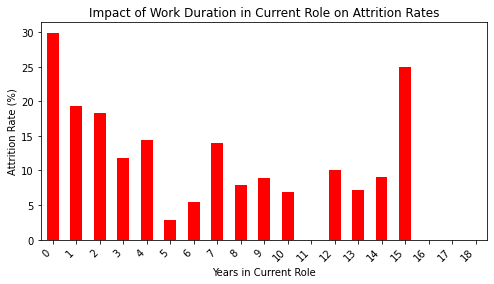

In [80]:
# Calculate attrition rates
attrition_rates = df.groupby('YearsInCurrentRole')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

# Create a bar chart
plt.figure(figsize=(8, 4))
attrition_rates.plot(kind='bar',color='red')
plt.xlabel('Years in Current Role')
plt.ylabel('Attrition Rate (%)')
plt.title('Impact of Work Duration in Current Role on Attrition Rates')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.show()

In [97]:
education_field = df.groupby("Attrition")["EducationField"].value_counts().reset_index(name="Count")
# Create a count plot to visualize attrition by education field
fig = px.bar(education_field, x="EducationField", y="Count", color="Attrition",barmode='overlay',opacity=0.9, title="Attrition by Education Field")
fig.update_layout(xaxis_title="Education Field", yaxis_title="Count", legend_title="Attrition")
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

**Life Sciences and Medical Field have more attirtion rate**

In [101]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="EducationField",
    y="MonthlyIncome",
    color="EducationField",
    facet_col="Attrition",
    title="Monthly Income Distribution by EducationField and Attrition",
    labels={"EducationField": "EducationField", "MonthlyIncome": "MonthlyIncome"},
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig.show()

**Lower Monthly Income results more attrition**

In [102]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="EducationField",
    y="DailyRate",
    color="EducationField",
    facet_col="Attrition",
    title="Monthly Income Distribution by EducationField and Attrition",
    labels={"EducationField": "EducationField", "MonthlyIncome": "MonthlyIncome"},
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig.show()

In [99]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="Department",
    y="MonthlyIncome",
    color="Department",
    facet_col="Attrition",
    title="Monthly Income Distribution by Department and Attrition",
    labels={"Department": "Department", "MonthlyIncome": "MonthlyIncome"},
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig.show()

In [127]:
fig = px.violin(df, y="MonthlyIncome", x="Attrition", color="Attrition", box=True,
                title="Attrition vs. Monthly Income",points="all",
                color_discrete_map={"Yes": "red", "No": "green"})
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

**Employees with Monthly Income < 5K have more attrition rate**

In [100]:
# Calculate attrition rates for each department
attrition_rates = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

# Find the department with the highest attrition rate
department_with_highest_attrition = attrition_rates.idxmax()

print(f"The department facing the highest attrition problem is: {department_with_highest_attrition}")

The department facing the highest attrition problem is: Sales


In [103]:
# Create a box plot using Plotly Express
fig = px.box(
    data_frame=df,
    x="JobRole",
    y="PercentSalaryHike",
    color="JobRole",
    facet_col="Attrition",
    title="PercentSalaryHike Distribution by JobRole and Attrition",
    labels={"JobRole": "EducationField", "PercentSalaryHike": "PercentSalaryHike"},
    color_discrete_sequence=px.colors.qualitative.Set1,
)
fig.show()

In [125]:
# Create a bar plot using Plotly 
Job_role = df.groupby("Attrition")["JobRole"].value_counts().reset_index(name="Count")

fig = px.bar(Job_role, x="JobRole", y="Count", color="Attrition",barmode="overlay",
             title="The most job role of Attritions", opacity=0.9,
             color_discrete_map={"Yes": "red", "No": "green"})
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

**Research Scientist, Lab Technicians and Sales Representatives have comparitevely more attirtinon rate**

In [121]:
# Group the data by Attrition and DistanceFromHome 
grouped_distance = df.groupby("Attrition")["DistanceFromHome"].value_counts().reset_index(name="Count")

# Create a bar plot using Plotly 
fig = px.bar(grouped_distance, x="DistanceFromHome", y="Count", color="Attrition",
             title="Distribution of Distance from Home by Attrition",barmode="overlay",opacity=0.7,
             labels={"DistanceFromHome": "Distance from Home", "Count": "Count"},
             color_discrete_map={"Yes": "red", "No": "green"})
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

In [130]:
# Create a bar plot using Plotly 
travel = df.groupby("Attrition")["BusinessTravel"].value_counts().reset_index(name="Count")

fig = px.bar(travel, x="BusinessTravel", y="Count", color="Attrition",barmode="overlay",
             title="Effect of Business Travel on Attritions", opacity=0.9,
             color_discrete_map={"Yes": "red", "No": "green"})
fig.update_layout(title_x=0.5, title_font=dict(size=20))
fig.show()

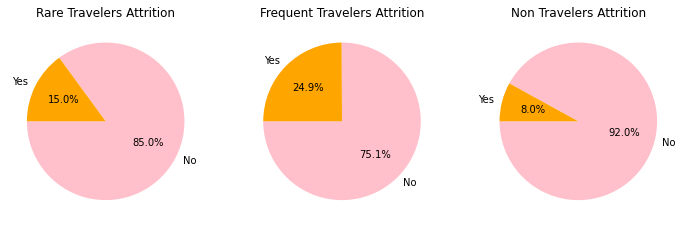

In [137]:
# Cross-tabulate OverTime and Attrition
travel = pd.crosstab(df['Attrition'], df['BusinessTravel'])

# Plot a pie chart for each category of OverTime
fig, axs = plt.subplots(1,3, figsize=(12,6))
labels = travel.index
colors = ['pink', 'orange']
axs[0].pie(travel['Travel_Rarely'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[1].pie(travel['Travel_Frequently'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[2].pie(travel['Non-Travel'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
axs[0].set_title("Rare Travelers Attrition")
axs[1].set_title("Frequent Travelers Attrition")
axs[2].set_title("Non Travelers Attrition")
#plt.axis('equal')
#plt.tight_layout()
plt.show()

**Frequent Buisness Traveler have higher attrition rate**

#### Percent Job titles

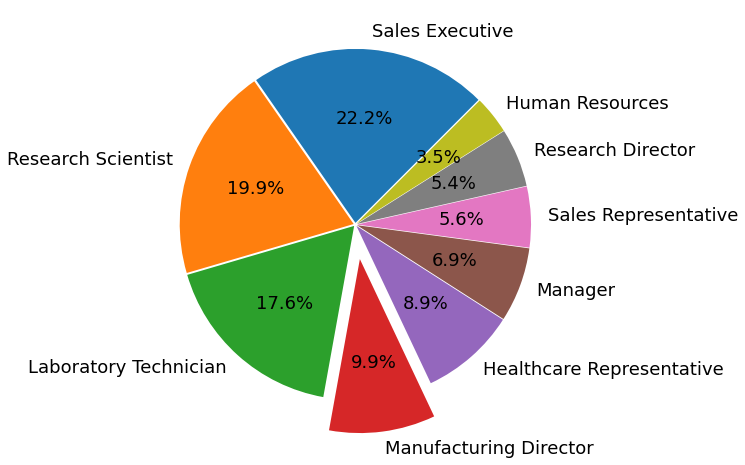

In [150]:
plt.figure(figsize=(8,8))
d=df["JobRole"].value_counts(normalize=True)*100
keys=df["JobRole"].value_counts().index
exploda = (0.01, 0.01, 0.01, 0.2, 0.01,0.01,0.01,0.01,0.01)
#plt.pie(d, labels = keys, autopct='%1.1f%%', explode=exploda, shadow=True, startangle=45,textprops={'color':"w",'fontsize': 14})
plt.pie(d, labels = keys, autopct='%1.1f%%', explode=exploda, startangle=,textprops={'fontsize': 18})
plt.show()

## Looking for correlations between variables

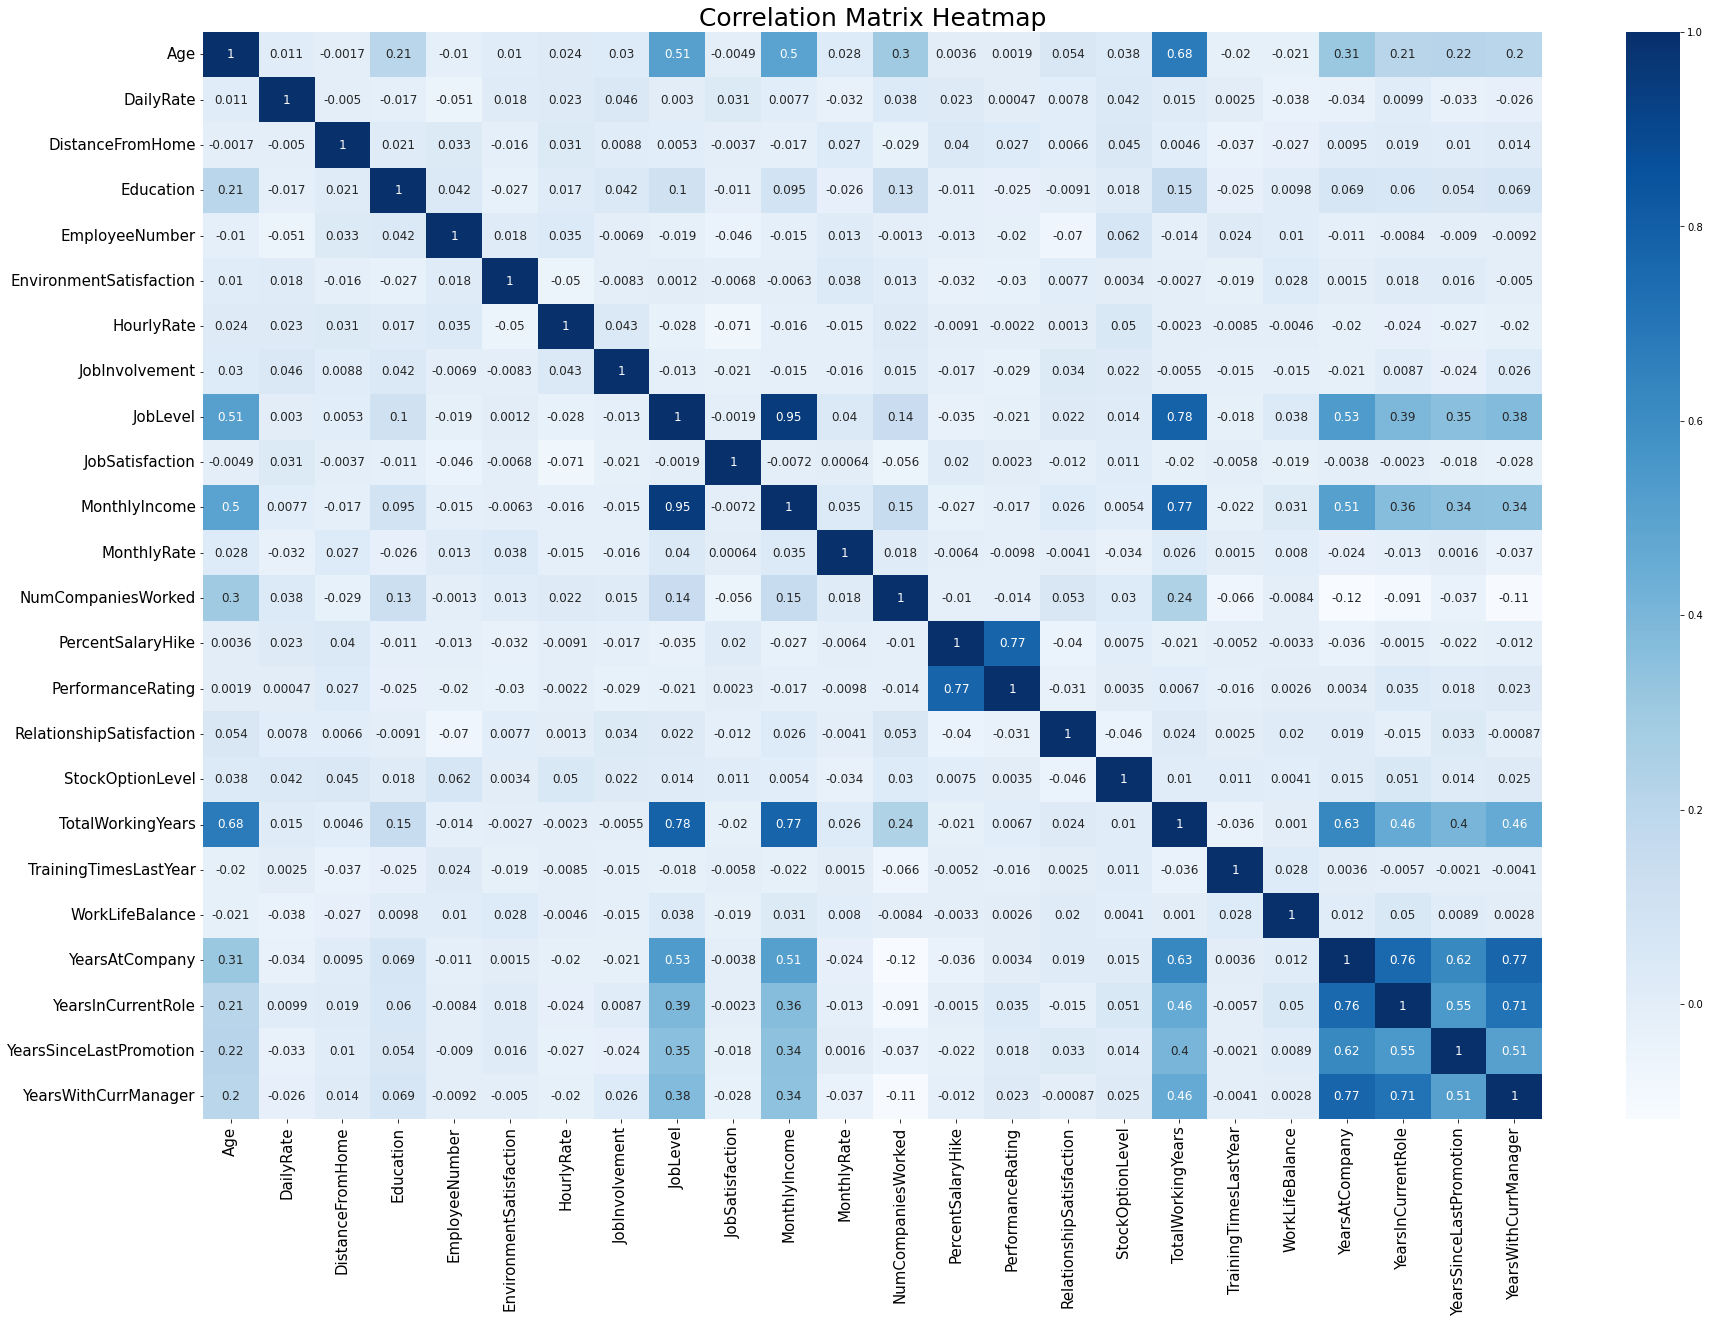

In [128]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(correlation_matrix, cmap='Blues',annot=True,annot_kws={"size": 12})

# Set font size for column labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)


plt.title("Correlation Matrix Heatmap", fontsize=25)
plt.show()

In [157]:
# making copy of original data
df1=df.copy()


## label encoding for categorical columns to convert them to numerical values

In [158]:
df1['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [161]:
for i in df1['BusinessTravel']:
    df1['BusinessTravel'].replace({'Non-Travel':1,'Travel_Rarely': 2,'Travel_Frequently':3},inplace = True)

In [159]:
df1['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [160]:
for i in df1['Department']:
       df1['Department'].replace({'Sales':1,'Research & Development': 2,'Human Resources':3},inplace = True)

In [162]:
df1['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [163]:
for i in df1['EducationField']:
       df1['EducationField'].replace({'Life Sciences':1,'Medical': 2,'Marketing':3, 'Technical Degree':4, 'Human Resources':5, 'Other':6},inplace = True)

In [164]:
df1['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [165]:
for i in df1['OverTime']:
       df1['OverTime'].replace({'Yes':1,'No': 0},inplace = True)

In [166]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [167]:
for i in df1['Gender']:
       df1['Gender'].replace({'Female':1,'Male': 0},inplace = True)

In [168]:
df1['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [169]:
for i in df1['JobRole']:
       df1['JobRole'].replace({'Sales Executive':1,'Research Scientist': 2,'Laboratory Technician':3,'Manufacturing Director':4,
                              'Healthcare Representative':5,'Manager':6, 'Sales Representative':7, 'Research Director':8, 'Human Resources':9},inplace = True)

In [170]:
df1['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [171]:
for i in df1['MaritalStatus']:
       df1['MaritalStatus'].replace({'Single':1,'Married': 2, 'Divorced': 3},inplace = True)

In [172]:
for i in df1['Attrition']:
       df1['Attrition'].replace({'Yes':1,'No': 0},inplace = True)

### Model Building

In [137]:
df1.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           1                 1   
1   49          0               3        279           2                 8   
2   37          1               2       1373           2                 2   
3   33          0               3       1392           2                 3   
4   27          0               2        591           2                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               6               4                        4  ...   
3          4               1               5                        4  ...   
4          1               2               7                        1  ...   

  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                 3                         1                 0   
1                 4                         4                 1   
2                 3                         2                 0   
3                 3                         3                 0   
4                 3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 32 columns]

In [175]:
X=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [176]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [177]:
import plotly.express as px
#fig, axis = plt.subplots(6, 6,figsize=(30,30))
fig = px.scatter_matrix(df1, dimensions=['Age', 'DailyRate', 'DistanceFromHome',
        
       'EnvironmentSatisfaction', 'HourlyRate',
       
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike',
     'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], color='Attrition',width=2000, height=2000);

fig.update_traces(marker=dict(size=3))
fig.update_layout(font=dict(
        size=8))
fig.show()

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [181]:
y_test.value_counts() # it shows data imbalance or skewed towards 0.

0    316
1     52
Name: Attrition, dtype: int64

### Handling data imbalance

In [185]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.25)

In [187]:
Y_test.value_counts()

0    311
1    306
Name: Attrition, dtype: int64

## Using Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [189]:
forest.score(X_train, Y_train)

0.9951325040562466

In [190]:
forest.score(X_test, Y_test)

0.8897893030794165

In [195]:
Y_predRF=forest.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,Y_predRF))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       311
           1       0.91      0.86      0.89       306

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



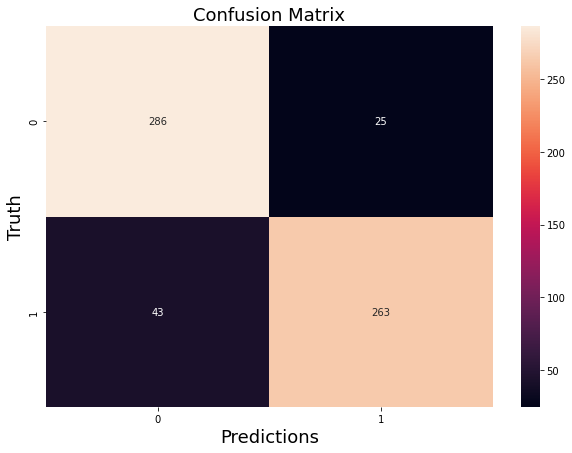

In [206]:
cm = confusion_matrix(y_true=Y_test, y_pred=Y_predRF)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Truth', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Using Logistic Regression Classifier

In [191]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train,Y_train)

LogisticRegression()

In [192]:
y_prediction=LG.predict(X_test)

In [193]:
LG.score(X_test,Y_test)

0.6693679092382496

In [194]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       311
           1       0.66      0.69      0.67       306

    accuracy                           0.67       617
   macro avg       0.67      0.67      0.67       617
weighted avg       0.67      0.67      0.67       617



### Using XGBoost Classifier

In [198]:
import xgboost as xg
xgb_classifier = xg.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
xgb_classifier.fit(X_train, Y_train)

# objective= 'multi:softprob' used for multiclass classification problem 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [199]:
y_predxg=xgb_classifier.predict(X_test)

In [200]:
 xgb_classifier.score(X_train, Y_train)

0.9502433747971877

In [201]:
 xgb_classifier.score(X_test, Y_test)

0.8816855753646677

In [202]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,y_predxg))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       311
           1       0.88      0.88      0.88       306

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



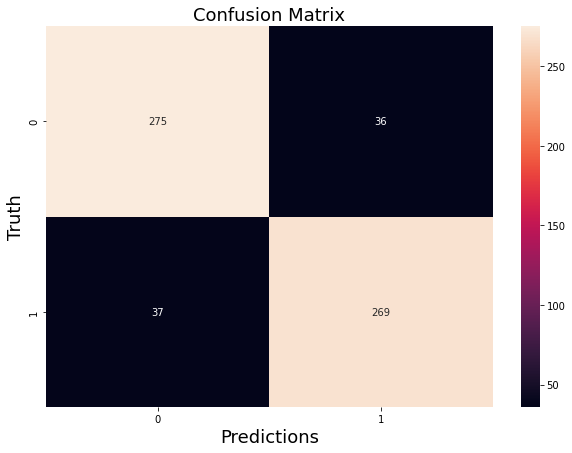

In [205]:
cm = confusion_matrix(y_true=Y_test, y_pred=y_predxg)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Truth', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [203]:
# checking our model prediction with actual values
Y_test[10:15]

135     0
1662    1
1659    1
924     0
717     0
Name: Attrition, dtype: int64

In [204]:
y_predxg[10:15]

array([0, 1, 1, 0, 0])

#### Result: XgBoost and Random Forest model performed better in our case with 88-89% f1 score.

# Conclusion

### Key insights and findings from the analysis include:

- The attrition rate in the organization is approximately 16%.
- Gender does not seem to have a significant impact on attrition. Females have 14.8% and Males have 17% attrition rate.
- Employees who travel frequently have a higher attrition rate of 24% followed by Rare travelers 15% and Non traveles only 8%.
- Distance from home does not appear to be a major factor in attrition.
- The "Research & Development" department has the highest count of attritions, followed by "Sales" and "Human Resources."
- Employees with educational background in "Life Sciences" and  "Medical" have higher attrition. 
- The job role of "Laboratory Technician" has the highest attrition rate.
- Employees with Marital status 'Single' have higher attrition rate.
- Employees who work overtime have a higher attrition rate of 30% compare to No overtime workers 10%.
- Short tenures with the current manager (0-1 years) are associated with higher attrition.
- Lower salaries, particularly those below monthly income 5k are associated with higher attrition rates.
- Higher environment and job satisfaction levels are correlated with lower attrition rates.
- Age groups around 29 and 37 have higher attrition rates.
- Education field and marital status can impact attrition.
- Employees who have worked for more than 5 companies previously are more like to go for attrition. 
- Higher environment and job satisfaction levels are correlated with lower attrition rates.
- Employees with Stock Option Level 0 have a higher attrition rate.
- Work Life Balance ratings of 1 are associated with the highest attrition rate.
- Employees with lower job satisfaction (ratings 1 and 3) have higher attrition rates.
- Employees with less than a year of experience with the current manager tend to have higher attrition rates.
- Employees with less than a 10 years of Total working experience tend to have higher attrition rates.



**Based on these insights, potential measures to retain employees and reduce attrition include improving work-life balance, addressing job satisfaction, providing growth and advancement opportunities, addressing salary concerns, and implementing effective management and coaching strategies. The project also highlighted the importance of data-driven decision-making in human resource management.**